<a href="https://colab.research.google.com/github/ilyasa2002/mendeteki_jantung/blob/main/Mendeteksi_Penyakit_Jantung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
# upload data set
file = pd.read_csv('https://raw.githubusercontent.com/Putra29112000/Tugas/main/UAS/heart.csv')

In [ ]:
file.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(file.shape)

(303, 14)


In [ ]:
X_train = file

In [ ]:
# mentraining data dengan variabel
X_new_train = X_train.drop('target', axis = 1)
Y_train = file['target']
X_new_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
Y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
print(X_new_train.shape, Y_train.shape)

(303, 13) (303,)


In [ ]:
# membuat class algoritma jaringan syaraf
class perceptron:
  
  def __init__(self):
    self.b = None
    self.w = None
  
  def model(self, x):
    return (np.dot(self.w, x) >= self.b)

  def predict(self, X):
    
    Y_pred = list()
    for x in X:
      y_pred = self.model(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)
  
  def fit(self, X, Y,epochs = 3, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    max_accuracy = 0
    
    accuracy = dict()
    
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        
        if y == 1 and y_pred == 0:
          self.w += lr * x
          self.b += lr * 1
        if y == 0 and y_pred == 1:
          self.w -= lr * x
          self.b -= lr * 1
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if(max_accuracy < accuracy[i]):
        max_accuracy = accuracy[i]
        chkp_w = self.w
        chkp_b = self.b
    self.w = chkp_w
    self.b = chkp_b
    
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.ylim([0,1])
    plt.show()
    
    print('Maximum Accuracy: ',max_accuracy)

In [ ]:
pc = perceptron()

In [ ]:
X_train = X_train.values
Y_train = Y_train.values

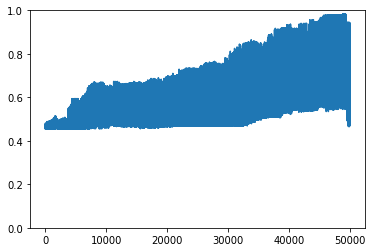

Maximum Accuracy:  0.9834983498349835


In [ ]:
# menampilkan data dalam bentuk grafik
pc.fit(X_train, Y_train,50000, 0.001)

In [ ]:
# input detail general chekup user
print('Masukkan detail berikut untuk memprediksi apakah seseorang lebih mungkin terkena Penyakit Jantung atau tidak: ')
a = int(input('Usia : '))
s = int(input('Gender [laki-1, wanita-2]: '))
c  = int(input('Sakit dada[\nValue 1: typical angina \nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic]:\n'))
tr = int(input('Tekanan Darah(dalam mm Hg saat masuk rumah sakit) nilai [80 - 200]: '))
ch = int(input('kolestrol dalam mg/dl [90 - 580]: '))
f = int(input('Gula dalam darah saat puasa > 120 mg/dl[0,1]: '))
r = int(input('hasil elektrokardiografi istirahat\nValue 0: normal\nValue 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) \nnilai[0,1]:\n'))
t = int(input('detak jantung maksimum tercapai [60 - 210]: '))
e = int(input('angina yang diinduksi olahraga [0,1]: '))
o = int(input('Depresi yang diinduksi oleh olahraga relatif terhadap istirahat [0 to 7]: '))
sl = int(input('slope [0,1,2]: '))	
ca = int(input('jumlah pembuluh utama yang diwarnai oleh flourosopy [0,1,2]: '))
th = int(input('thal [0,1,2,3]: '))
tar = int(input('tar value [0,1]: '))
l = list()
l.extend([a,s,c,tr,ch,f,r,t,e,o,sl,ca,th,l,tar])

Masukkan detail berikut untuk memprediksi apakah seseorang lebih mungkin terkena Penyakit Jantung atau tidak: 
Usia : 21
Gender [laki-1, wanita-2]: 1
Sakit dada[
Value 1: typical angina 
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic]:
1
Tekanan Darah(dalam mm Hg saat masuk rumah sakit) nilai [80 - 200]: 300
kolestrol dalam mg/dl [90 - 580]: 100
Gula dalam darah saat puasa > 120 mg/dl[0,1]: 1
hasil elektrokardiografi istirahat
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
nilai[0,1]:
1
detak jantung maksimum tercapai [60 - 210]: 100
angina yang diinduksi olahraga [0,1]: 1
Depresi yang diinduksi oleh olahraga relatif terhadap istirahat [0 to 7]: 8
slope [0,1,2]: 3
jumlah pembuluh utama yang diwarnai oleh flourosopy [0,1,2]: 3
thal [0,1,2,3]: 4
tar value [0,1]: 2


In [ ]:
l.append(tar)
del l[13]
ln = np.asarray(l[0:14])
print(ln)

[ 21   1   1 300 100   1   1 100   1   8   3   3   4   2]


In [ ]:
for x in X_train:
  print(x)

[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
   1.    1. ]
[ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
   2.    1. ]
[ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
   2.    1. ]
[ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
   2.    1. ]
[ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
   2.    1. ]
[ 57.    1.    0.  140.  192.    0.    1.  148.    0.    0.4   1.    0.
   1.    1. ]
[ 56.    0.    1.  140.  294.    0.    0.  153.    0.    1.3   1.    0.
   2.    1. ]
[ 44.   1.   1. 120. 263.   0.   1. 173.   0.   0.   2.   0.   3.   1.]
[ 52.    1.    2.  172.  199.    1.    1.  162.    0.    0.5   2.    0.
   3.    1. ]
[ 57.    1.    2.  150.  168.    0.    1.  174.    0.    1.6   2.    0.
   2.    1. ]
[ 54.    1.    0.  140.  239.    0.    1.  160.    0.    1.2   2.    0.
   2.    1. ]
[4.80e+01 0.00e+00 2.00e+00 1.30e+02 2.75e+02 0.00e+00 1.00e+00 1.39

In [ ]:
print(ln.shape)

(14,)


In [ ]:
g = pc.model(np.array(ln))
print('Sepertinya kamu bakal kena penyakit\nmakanya jaga pola hidup kamu say!' if g == True else 'G usah khawatir kamu dalam keadaan baik baik saja\njaga pola hidup kamu say!' )

Sepertinya kamu bakal kena penyakit
makanya jaga pola hidup kamu say!
